In [97]:
import pyodbc
import pandas as pd
import requests
import json
import numpy as np
from datetime import datetime
pd.options.mode.chained_assignment = None

In [98]:
data = pd.read_csv('./MRV Data - Curated_info.csv')
data.head()

,IMO Number,Name,Ship type,Reporting Period,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],Annual average Fuel consumption per distance [kg / n mile],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles],Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]
0,6602898,OCEAN MAJESTY,Passenger ship,2020,EIV (31.73 gCO₂/t·nm),951.37,2985.13,132.07,414.4,NaN,NaN
1,6703343,EQUALITY,Other ship types,2020,EIV (57.84 gCO₂/t·nm),225.70,706.78,40.75,127.62,67.66,211.88
2,7037806,IONIAN STAR,Ro-pax ship,2020,EIV (19.4 gCO₂/t·nm),1543.32,4947.88,103.93,333.19,NaN,NaN
3,7043843,TALOS,Ro-ro ship,2020,EIV (48.71 gCO₂/t·nm),2625.33,8416.81,64.28,206.09,168.74,540.98
4,7128332,SEA WIND,Ro-pax ship,2020,EIV (9.29 gCO₂/t·nm),4152.78,13137.92,86.64,274.09,NaN,NaN


Keep only the oil tankers with values on total fuel.

Replace 'division by zero' with NaN.

New pandas with imo, name, vesselclass, annual cons per distance, annual emission per distance.

In [99]:
data = data[(data['Ship type']=='Oil tanker') 
            &(data['Total fuel consumption [m tonnes]'] > 0) 
            &(data['Total CO₂ emissions [m tonnes]'] > 0)]
data['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]'] =(
    data['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'] = (
    data['Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]']
    .apply(lambda x: np.nan if x=='Division by zero!' else x))
data.rename(columns= {'IMO Number' : 'IMO'}, inplace=True)

data.head()

,IMO,Name,Ship type,Reporting Period,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],Annual average Fuel consumption per distance [kg / n mile],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles],Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]
249,8905787,IRINI,Oil tanker,2020,EIV (10.4 gCO₂/t·nm),2216.30,7050.58,84.58,269.07,15.42,49.07
345,9010929,ZIRCONE,Oil tanker,2020,EIV (20.45 gCO₂/t·nm),1900.10,5917.99,123.98,386.14,28.1,87.51
613,9125279,NORMANNA,Oil tanker,2020,EIV (15.36 gCO₂/t·nm),2088.77,6550.71,82.97,260.19,10.3,32.3
744,9145437,CASTILLO DE MONTERREAL,Oil tanker,2020,EIV (7.64 gCO₂/t·nm),3617.50,11345.81,121.91,382.36,11.14,34.93
782,9150614,HAI GONG YOU 306,Oil tanker,2020,EIV (12.59 gCO₂/t·nm),1220.84,3840.79,77.04,242.37,7.97,25.08


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 249 to 11823
Data columns (total 11 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   IMO Number                                                                           1861 non-null   int64  
 1   Name                                                                                 1861 non-null   object 
 2   Ship type                                                                            1861 non-null   object 
 3   Reporting Period                                                                     1861 non-null   int64  
 4   Technical efficiency                                                                 1861 non-null   object 
 5   Total fuel consumption [m tonnes]                                                    18

In [100]:
data.dropna(subset=['Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]', 
                    'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]'], inplace = True)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835 entries, 249 to 11823
Data columns (total 11 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   IMO                                                                                  1835 non-null   int64  
 1   Name                                                                                 1835 non-null   object 
 2   Ship type                                                                            1835 non-null   object 
 3   Reporting Period                                                                     1835 non-null   int64  
 4   Technical efficiency                                                                 1835 non-null   object 
 5   Total fuel consumption [m tonnes]                                                    18

In [102]:
#float 
data['Annual average Fuel consumption per distance [kg / n mile]'] = data['Annual average Fuel consumption per distance [kg / n mile]'].astype(float)
data['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = data['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].astype(float)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835 entries, 249 to 11823
Data columns (total 11 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   IMO                                                                                  1835 non-null   int64  
 1   Name                                                                                 1835 non-null   object 
 2   Ship type                                                                            1835 non-null   object 
 3   Reporting Period                                                                     1835 non-null   int64  
 4   Technical efficiency                                                                 1835 non-null   object 
 5   Total fuel consumption [m tonnes]                                                    18

In [104]:
#columns = ['IMO','Vessel Name', 'Main Engine RPM', 
#           'Deadweight', 'Gross Rated Tonnage', 'YearBuilt', 
#           'Annual average fuel consumption per distance']

columns = ['IMO', 'Main Engine RPM','Deadweight', 
           'Gross Rated Tonnage', 'YearBuilt']

vessel_info = pd.DataFrame(columns=columns)

In [105]:
vessel_info

,IMO,Main Engine RPM,Deadweight,Gross Rated Tonnage,YearBuilt


In [110]:
imolist = data.IMO.tolist()
print(len(imolist))

1835


In [ ]:
### Connected to db's here and got some info. Removed the code

In [112]:
coma_list = ','.join([str(i) for i in imolist])

In [113]:
vessel_info = get_vessel_info(coma_list)

In [114]:
vessel_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMO                1812 non-null   int64  
 1   MainEngineRPM      1714 non-null   float64
 2   Deadweight         1812 non-null   int64  
 3   GrossRatedTonnage  1812 non-null   int64  
 4   Yearbuilt          1812 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 70.9 KB


In [115]:
avg_cons_per_distance = data[['IMO', 'Annual average Fuel consumption per distance [kg / n mile]']]
avg_cons_per_distance.head()

,IMO,Annual average Fuel consumption per distance [kg / n mile]
249,8905787,84.58
345,9010929,123.98
613,9125279,82.97
744,9145437,121.91
782,9150614,77.04


## Merge the MRV dataset with some info from the database

In [116]:
vessel_info_1 = pd.merge(vessel_info, avg_cons_per_distance, how = 'left', on=['IMO'])

In [117]:
vessel_info_1.head()

,IMO,MainEngineRPM,Deadweight,GrossRatedTonnage,Yearbuilt,Annual average Fuel consumption per distance [kg / n mile]
0,9199713,104.0,106644,57331,1999,158.15
1,9227443,91.0,164214,84598,2002,175.07
2,9248796,127.0,39975,25287,2003,108.13
3,9248801,127.0,40039,25287,2003,99.63
4,9249075,82.0,166739,84315,2004,227.72


In [118]:
vessel_info_1.dropna(subset=['MainEngineRPM'], inplace = True)

In [119]:
vessel_info_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 1811
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   IMO                                                         1714 non-null   int64  
 1   MainEngineRPM                                               1714 non-null   float64
 2   Deadweight                                                  1714 non-null   int64  
 3   GrossRatedTonnage                                           1714 non-null   int64  
 4   Yearbuilt                                                   1714 non-null   int64  
 5   Annual average Fuel consumption per distance [kg / n mile]  1714 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 93.7 KB


This is linear regression with avg fuel consumption per distance as the dependant variable

In [120]:
x = vessel_info_1.drop(['Annual average Fuel consumption per distance [kg / n mile]', 'IMO'], axis = 1).values
x

array([[1.04000e+02, 1.06644e+05, 5.73310e+04, 1.99900e+03],
       [9.10000e+01, 1.64214e+05, 8.45980e+04, 2.00200e+03],
       [1.27000e+02, 3.99750e+04, 2.52870e+04, 2.00300e+03],
       ...,
       [1.11000e+02, 3.74300e+04, 2.34200e+04, 2.01900e+03],
       [6.60000e+01, 3.02000e+05, 1.57208e+05, 2.02000e+03],
       [6.60000e+01, 2.99772e+05, 1.54046e+05, 2.02000e+03]])

In [121]:
#y = data['Annual average Fuel consumption per distance [kg / n mile]'].values
y = vessel_info_1['Annual average Fuel consumption per distance [kg / n mile]'].values
y


array([158.15, 175.07, 108.13, ..., 117.8 , 200.28, 446.26])

In [123]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

In [124]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [125]:
y_pred = ml.predict(x_test)
print (y_pred)

[ 83.60901216 126.1115564  114.35581392  79.2490548  149.68565761
 142.21057125 137.61466447 130.5212444  259.89162119 140.78639012
 152.6264207  116.79859533  98.81252073 102.74567052 159.55746553
 179.46432136 121.16540512 128.2168372  134.02371152 145.71608417
 170.40887752 123.34479922 152.09160305 129.38008199  98.72271757
 132.44881864 110.40023068 164.16324886 173.01638683 155.11942613
 108.14298871 142.39367804 151.71727982 176.20693036 125.07563605
 116.97100239 133.85237951 117.69111091  90.54276701 148.85676533
 131.6326502  281.03333277 136.43187262 183.79318272 170.23906051
 141.6032268  160.11798331 274.08875259 136.21115808  83.64534612
 156.23523953 152.64590046  83.6108616  142.80520131  86.81205011
 119.14715471 145.42442982 111.82502165 111.63556457 141.33849832
 119.4984842  116.7143766  149.22235917 148.83647356  91.82292939
  87.26082774 160.91791881 142.38258144 143.71992544 135.20319848
 175.97248365 177.84107812 150.03941176 110.40640088  78.2359889
 110.774378

evaluate the model

In [128]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.612792668751048

plot results

Text(0, 0.5, 'Predicted')

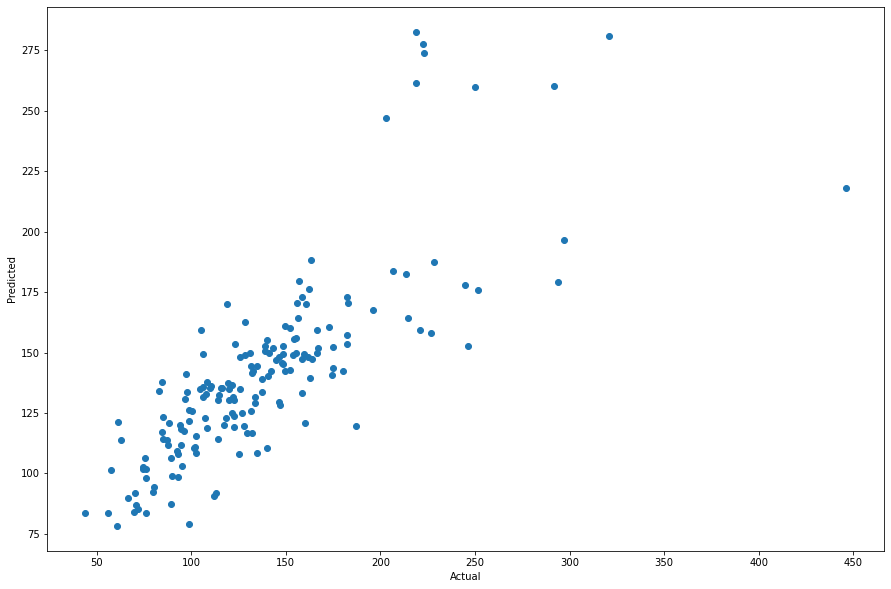

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [133]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:30]

,Actual Value,Predicted Value,Difference
0,55.83,83.609012,-27.779012
1,98.94,126.111556,-27.171556
2,84.96,114.355814,-29.395814
3,98.99,79.249055,19.740945
4,166.33,149.685658,16.644342
5,180.03,142.210571,37.819429
6,119.29,137.614664,-18.324664
7,114.33,130.521244,-16.191244
8,249.83,259.891621,-10.061621
9,174.37,140.786390,33.583610


This is linear regression with avg fuel emission per distance as the dependant variable

In [135]:
avg_emis_per_distance = data[['Annual average CO₂ emissions per distance [kg CO₂ / n mile]', 'IMO']]
avg_emis_per_distance.head()

,Annual average CO₂ emissions per distance [kg CO₂ / n mile],IMO
249,269.07,8905787
345,386.14,9010929
613,260.19,9125279
744,382.36,9145437
782,242.37,9150614


In [136]:
vessel_info_2 = pd.merge(vessel_info, avg_emis_per_distance, how = 'left', on=['IMO'])
vessel_info_2.dropna(subset=['MainEngineRPM'], inplace = True)
vessel_info_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 1811
Data columns (total 6 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   IMO                                                          1714 non-null   int64  
 1   MainEngineRPM                                                1714 non-null   float64
 2   Deadweight                                                   1714 non-null   int64  
 3   GrossRatedTonnage                                            1714 non-null   int64  
 4   Yearbuilt                                                    1714 non-null   int64  
 5   Annual average CO₂ emissions per distance [kg CO₂ / n mile]  1714 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 93.7 KB


In [137]:
vessel_info_2.head()

,IMO,MainEngineRPM,Deadweight,GrossRatedTonnage,Yearbuilt,Annual average CO₂ emissions per distance [kg CO₂ / n mile]
0,9199713,104.0,106644,57331,1999,500.44
1,9227443,91.0,164214,84598,2002,553.05
2,9248796,127.0,39975,25287,2003,340.64
3,9248801,127.0,40039,25287,2003,315.65
4,9249075,82.0,166739,84315,2004,713.94


In [138]:
x = vessel_info_2.drop(['Annual average CO₂ emissions per distance [kg CO₂ / n mile]', 'IMO'], axis = 1).values
y = vessel_info_2['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].values

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

ml = LinearRegression()
ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)


In [143]:
ml.predict([[200.0, 12223, 9094, 1995]])

array([443.61744047])

In [144]:
r2_score(y_test, y_pred)

0.4398813919451934

Text(0, 0.5, 'Predicted')

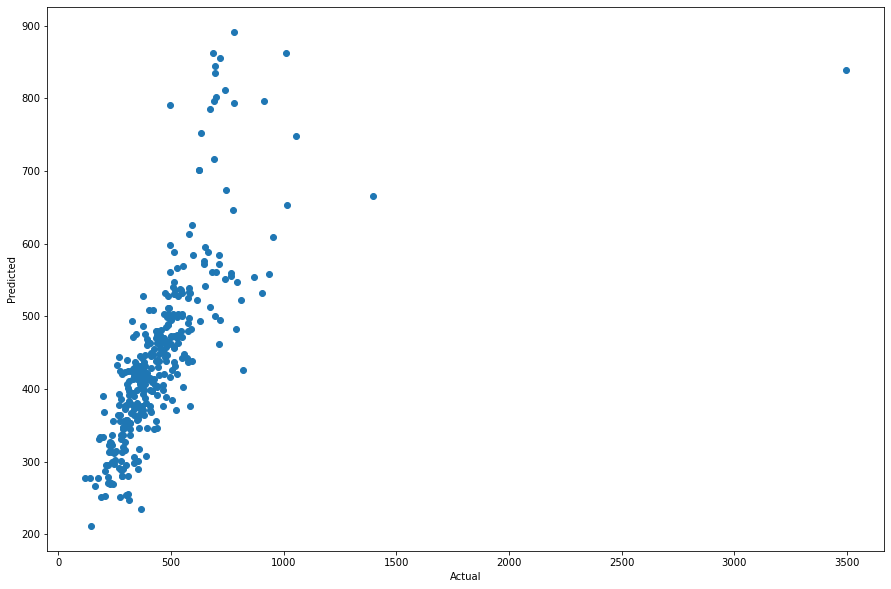

In [145]:
plt.figure(figsize = (15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [146]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:30]

,Actual Value,Predicted Value,Difference
0,176.27,278.022649,-101.752649
1,309.04,402.227986,-93.187986
2,265.21,364.979184,-99.769184
3,308.87,255.334303,53.535697
4,525.86,469.979146,55.880854
5,571.31,443.381605,127.928395
6,376.52,427.392909,-50.872909
7,361.44,406.599891,-45.159891
8,780.00,793.443775,-13.443775
9,551.24,442.411092,108.828908


### Checking that the saved model from model_3 data work correct

In [35]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_neural = model_from_json(loaded_model_json)
# load weights into new model
model_neural.load_weights("model.h5")
model_neural.compile(loss='mean_squared_error', optimizer='adam')


In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
X = [[9010929, 12111, 12112, 121211, 2000]]
PredictorScaler = StandardScaler()
PredictorScalerFit = PredictorScaler.fit(X)
X = PredictorScalerFit.transform(X)
consumption2 = np.round(model_neural.predict(X), 1)

In [19]:
print (consumption2)

[[0.1]]


In [30]:
X =[[  3360,  12223,   9094,   1995],
 [  3360,  12223,   9094  , 1995],
 [  4080,   8000 ,  5045 , 1993]]
PredictorScaler = StandardScaler()
PredictorScalerFit = PredictorScaler.fit(X)
print (X)
print (PredictorScalerFit)
X = PredictorScalerFit.transform(X)
print (X)

[[3360, 12223, 9094, 1995], [3360, 12223, 9094, 1995], [4080, 8000, 5045, 1993]]
StandardScaler()
[[-0.70710678  0.70710678  0.70710678  0.70710678]
 [-0.70710678  0.70710678  0.70710678  0.70710678]
 [ 1.41421356 -1.41421356 -1.41421356 -1.41421356]]


In [33]:
from pickle import load

In [34]:
X =[[  3360,  12223,   9094,   1995]]
scaler = load(open('scaler_neural.pkl', 'rb'))
X_scaled = scaler.transform(X)
print (X_scaled)

[[ 492.47813237 2625.08813674 1882.64975249  379.29209809]]


In [36]:
model_neural.predict(X_scaled)

ValueError: in user code:

    File "C:\Users\p.alexias\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\p.alexias\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\p.alexias\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\p.alexias\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\p.alexias\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\p.alexias\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 4)
